In [1]:
!pip install tensorflow-gpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 1.4 MB/s eta 0:00:0000:0100:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 34.4 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 36.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MB 11.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 16.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 38.5 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: keras
    Found existing installation: keras 2.6.0
    Uninstalling keras-2.6.0:
      Successfully uninstalled keras-2.6.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator-2.6.0
  Attempting uninstall: protobuf
    Foun

In [2]:
!pip install tensorflow==2.8
!apt install --yes --allow-change-held-packages libcudnn8=8.1.0.77-1+cuda11.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.5/497.5 MB 2.2 MB/s eta 0:00:0000:0100:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 33.9 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 15.9 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.6.4
    Uninstalling tensorflow-2.6.4:
      Successfully uninstalled tensorflow-2.6.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency con

In [3]:
!pip install tfds-nightly -U --quiet

In [4]:
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import tensorflow as tf
import math

import tensorflow_datasets as tfds

# Goal of This Notebook

This notebook was prepared to compare the performance of tree-based algorithms with neural networks in binary text classification. You can find part 1 of this experiment in my profile.

# The Methodology

I used three different deep learning models for the comparison. The structures of NN models are different from the ones in the [article](https://arxiv.org/pdf/2009.09991.pdf) that I utilized. The reasons are

* My models also worked nicely even I didn't tune them.
* I didn't like some of the parameters in the article. For example to optimize researchers used AdaGrad optimizer. However, this activation function is not great because it can stop learning before reaching the global optimum [[1]](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/).

# The Content

1. [Linear Model](#1)
2. [RNN Model](#2)
3. [LSTM Model](#3)

[Conclusion](#4)

In [5]:
dataset = tfds.load('imdb_reviews',
                          as_supervised=True)

2022-07-08 07:00:36.064312: W tensorflow/core/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata".


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteWUC43I/imdb_reviews-train.tfrecord*...…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteWUC43I/imdb_reviews-test.tfrecord*...:…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteWUC43I/imdb_reviews-unsupervised.tfrec…

Dataset imdb_reviews downloaded and prepared to ~/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [6]:
train_ds = dataset["train"].batch(100)
test_ds = dataset["test"].batch(100)

train_ds = train_ds.cache().prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.cache().prefetch(tf.data.AUTOTUNE)

<a id='1'></a>
# 1. Linear Model

Linear NN model consists

1. **Embedding Layer:** To vectorize the vocabulary.
2. **Convolution Layer:** To capture important patterns.
3. **GlobalMaxPooling Layer:** To allow the Dense layer to handle data efficiently. You can also use a GlobalAveragePooling layer instead.

You can find a similar model [here](https://keras.io/examples/nlp/text_classification_from_scratch/)
.
* My hyperparameter selection strategy was this:

**A.** Select more epochs and number of units probably more than needed.

**B.** Regularize them with the dropout layer and use early stopping to prevent overfitting.

**Note:** My hyperparameter selection strategy probably not the best one. I suppose one can build better models with popular hyperparameter optimization algorithms. As far as I know, "[Hyperband](https://jmlr.org/papers/volume18/16-558/16-558.pdf)" works great on neural networks.

**Note:** Keep in mind that from now we will use more than an epoch so the embedding layer can extract semantic information more effectively.

In [7]:
sentence = tf.keras.Input(shape = (),dtype = tf.string)

MAX_TOKENS = 5000
indexer = tf.keras.layers.TextVectorization(max_tokens = MAX_TOKENS,
                                            output_mode = 'int',
                                            output_sequence_length = MAX_TOKENS)
indexer.adapt(train_ds.map(lambda x,y: x))

x = indexer(sentence)
x = tf.keras.layers.Embedding(input_dim = 5000, output_dim = 128)(x)
x = tf.keras.layers.Conv1D(128,7, padding = 'valid', activation = 'relu',strides = 3)(x)
x = tf.keras.layers.GlobalMaxPooling1D()(x)
x = tf.keras.layers.Dense(128,activation = 'relu')(x)
x = layers.Dropout(0.5)(x)
out = layers.Dense(1)(x)

linear_model = tf.keras.Model(sentence,out)
linear_model.compile(optimizer = 'adam',
              loss = tf.keras.losses.BinaryCrossentropy(from_logits = True),
              metrics = tf.metrics.BinaryAccuracy())
callbacks = [tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                            patience = 15,
                                             min_delta = 0.01,
                                             restore_best_weights = True)]
history = linear_model.fit(train_ds,validation_data = test_ds,epochs = 100, callbacks = callbacks)
linear_model.evaluate(test_ds)

Epoch 1/100


2022-07-08 07:01:40.110268: W tensorflow/stream_executor/gpu/asm_compiler.cc:111] *** WARNING *** You are using ptxas 11.0.221, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.

You may not need to update to CUDA 11.1; cherry-picking the ptxas binary is often sufficient.


250/250 [==============================] - 25s 90ms/step - loss: 0.5035 - binary_accuracy: 0.6950 - val_loss: 0.3014 - val_binary_accuracy: 0.8730
Epoch 2/100
250/250 [==============================] - 21s 84ms/step - loss: 0.2258 - binary_accuracy: 0.9059 - val_loss: 0.2853 - val_binary_accuracy: 0.8878
Epoch 3/100
250/250 [==============================] - 21s 85ms/step - loss: 0.1080 - binary_accuracy: 0.9643 - val_loss: 0.3284 - val_binary_accuracy: 0.8892
Epoch 4/100
250/250 [==============================] - 21s 85ms/step - loss: 0.0515 - binary_accuracy: 0.9838 - val_loss: 0.4466 - val_binary_accuracy: 0.8651
Epoch 5/100
250/250 [==============================] - 21s 84ms/step - loss: 0.0186 - binary_accuracy: 0.9949 - val_loss: 0.4970 - val_binary_accuracy: 0.8794
Epoch 6/100
250/250 [==============================] - 21s 84ms/step - loss: 0.0049 - binary_accuracy: 0.9993 - val_loss: 0.4897 - val_binary_accuracy: 0.8862
Epoch 7/100
250/250 [==============================] - 21s

[0.2853183448314667, 0.8878399729728699]

<a id='2'></a>
# 2. RNN Model

* RNN is a great choice when it comes to NLP processing because unlike Dense layers it can remember the information from previous epochs. However, its memory is short-term because, during backpropagation, the derivative of activation functions accumulates and prevents the more previous pieces of information to contribute the final prediction (Vanishing Gradient Problem). You can watch [this](https://www.youtube.com/watch?v=DFZ1UA7-fxY) video to understand the concept better.

**Note:** Seems like SimpleRNN layer does not utilize GPU [[2]](https://github.com/tensorflow/tensorflow/issues/42363). Therefore, I ran the RNN model for one epoch for illustration purposes.

In [8]:
sentence = tf.keras.Input(shape = (), dtype = tf.string)
indexer = tf.keras.layers.TextVectorization(max_tokens = MAX_TOKENS,
                                            output_mode = 'int',
                                            output_sequence_length = MAX_TOKENS)
indexer.adapt(train_ds.map(lambda x,y: x))

embedding = tf.keras.layers.Embedding(input_dim = MAX_TOKENS,
                                      output_dim = 512)

indexed_sentence = indexer(sentence)
embedded_sentence = embedding(indexed_sentence)
x = tf.keras.layers.SimpleRNN(100)(embedded_sentence)
x = tf.keras.layers.Dropout(0.5)(x)
output = tf.keras.layers.Dense(1)(x)

rnn_model = tf.keras.Model(sentence,output)

rnn_model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(from_logits = True),
    metrics = tf.metrics.BinaryAccuracy(),
    optimizer = tf.keras.optimizers.Adam(1e-4)
)

callbacks = [tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                            patience = 15,
                                             min_delta = 0.01,
                                             restore_best_weights = True)]
history = rnn_model.fit(train_ds, epochs = 1,validation_data = test_ds,callbacks = callbacks)
rnn_model.evaluate(test_ds)

250/250 [==============================] - 91s 362ms/step - loss: 0.6932 - binary_accuracy: 0.5000


[0.6931507587432861, 0.5]

<a id='3'></a>
# 3. LSTM Model 

* LSTM and RNN are used similarly. LSTM often works better than RNN in tasks that require more memorization. On the other hand, LSTM is computationally more expensive than RNN. There is a [blog](https://medium.com/analytics-vidhya/rnn-vs-gru-vs-lstm-863b0b7b1573) comparing GRU,LSTM and RNN. You can investigate the difference more deeply there.
* The LSTM model I used is similar to the one written in [keras documentation](https://keras.io/examples/nlp/bidirectional_lstm_imdb/).
* Why bidirectional LSTM? [[3]](https://openreview.net/pdf?id=rJvJXZb0W)

In [10]:
from tensorflow import keras

def get_lstm_model():
    
    indexer = layers.TextVectorization(output_mode = 'int')
    indexer.adapt(train_ds.map(lambda x,y: x))
    vocab_size = len(indexer.get_vocabulary())
    embedding = layers.Embedding(input_dim = vocab_size, output_dim = 128)

    inputs  = keras.Input(shape = (),dtype = tf.string)
    indexed_input = indexer(inputs)
    x = embedding(indexed_input)
    x = layers.Bidirectional(layers.LSTM(64, return_sequences = True))(x)
    x = layers.Bidirectional(layers.LSTM(64))(x)
    outputs = layers.Dense(1, activation = 'sigmoid')(x)
    lstm_model = keras.Model(inputs,outputs)
    lstm_model.compile(optimizer = 'adam',
                      loss = 'binary_crossentropy',
                      metrics = ['accuracy'])
    return lstm_model

lstm_model = get_lstm_model()

callbacks = [tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                            patience = 10,
                                             min_delta = 0.01,
                                             restore_best_weights = True)]

lstm_model.fit(train_ds, epochs = 100,validation_data = test_ds,callbacks = callbacks,validation_steps = 30)

Epoch 1/100
250/250 [==============================] - ETA: 0s - loss: 0.4601 - accuracy: 0.7906

2022-07-08 07:47:59.869664: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 62409728 exceeds 10% of free system memory.


250/250 [==============================] - 56s 202ms/step - loss: 0.4601 - accuracy: 0.7906 - val_loss: 1.7701 - val_accuracy: 0.4990


2022-07-08 07:48:00.429741: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 62409728 exceeds 10% of free system memory.


Epoch 2/100
250/250 [==============================] - 50s 201ms/step - loss: 0.4150 - accuracy: 0.8120 - val_loss: 0.3942 - val_accuracy: 0.8457
Epoch 3/100


2022-07-08 07:49:21.654549: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 62409728 exceeds 10% of free system memory.


250/250 [==============================] - 50s 199ms/step - loss: 0.2125 - accuracy: 0.9174 - val_loss: 0.3901 - val_accuracy: 0.8530
Epoch 4/100
250/250 [==============================] - 50s 198ms/step - loss: 0.1236 - accuracy: 0.9590 - val_loss: 0.5958 - val_accuracy: 0.8220
Epoch 5/100
250/250 [==============================] - 49s 198ms/step - loss: 0.0930 - accuracy: 0.9722 - val_loss: 0.5816 - val_accuracy: 0.8293
Epoch 6/100
250/250 [==============================] - 50s 199ms/step - loss: 0.1018 - accuracy: 0.9649 - val_loss: 0.5288 - val_accuracy: 0.8403
Epoch 7/100
250/250 [==============================] - 48s 192ms/step - loss: 0.0722 - accuracy: 0.9776 - val_loss: 0.5440 - val_accuracy: 0.8450
Epoch 8/100
250/250 [==============================] - 48s 193ms/step - loss: 0.0462 - accuracy: 0.9874 - val_loss: 0.5777 - val_accuracy: 0.8467
Epoch 9/100
250/250 [==============================] - 48s 193ms/step - loss: 0.0319 - accuracy: 0.9922 - val_loss: 0.6101 - val_accurac

2022-07-08 08:00:15.568381: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 62409728 exceeds 10% of free system memory.


In [11]:
lstm_model.evaluate(test_ds)

250/250 [==============================] - 20s 80ms/step - loss: 0.4025 - accuracy: 0.8404


[0.40253546833992004, 0.8403599858283997]

# 4. Bert Model

Bert algorithm is handy for NLP-specific tasks. In summary,
* The model contains multiple encoder parts of the transformers.
* Each transformer constitutes of multi-head self-attention layer, feed-forward network, and layer normalization.
* Multihead self-attention layer is used for context learning.
* Feed forward unit is used to prepare data for the following encoder.
* In the end, **for NLP classification**, a head is added to the stack of encoders so that this algorithm becomes supervised.
* Bert is fed with pretrained embedding vector + positional vectors.
* Self-attention unit can be parallelized so the bert model becomes faster than RNN alternatives.

To be honest, the algorithm is hard to understand. So I provide the resources I utilized, so you can embrace the concept better if you are not familiar with it.

1. [Transformers 1](https://deepai.org/machine-learning-glossary-and-terms/transformer-neural-network#:~:text=What%20is%20a%20Transformer%20Neural,area%20of%20natural%20language%20processing.)
2. [Transformers 2](https://medium.com/inside-machine-learning/what-is-a-transformer-d07dd1fbec04)
3. [Transformers 3](https://jalammar.github.io/illustrated-transformer/) (Recommend especially to understand self-attention layer)
4. [Bert (blog)](http://jalammar.github.io/illustrated-bert/)
5. [Bert (article)](https://arxiv.org/pdf/1810.04805.pdf)
6. [Bert (video)](https://www.youtube.com/watch?v=xI0HHN5XKDo)
7. [The role of feed forward unit](https://medium.com/synapse-dev/understanding-bert-transformer-attention-isnt-all-you-need-5839ebd396db)
8. [The example on Tensorflow](https://www.tensorflow.org/text/tutorials/classify_text_with_bert) 


**The Model**

Instead of making it from [scratch](https://keras.io/examples/nlp/masked_language_modeling/), I used one of the ready-to-use algorithms found in google hub. The model I chose was small bert because it requires less computational resources. 

**Issues:**

**Overfitting problem:** Bert model overfits. I followed the [recommendations](https://stackoverflow.com/questions/68098813/overfitting-when-fine-tuning-bert-sentiment-analysis).

* Early stopping: Check
* Get more data: Not possible
* Increase regularization: Tried dropout layer with different dropout ratios but it did not work.
* Reduce model complexity: Not possible.

**Optimizer Selection:** In the original paper, the model was trained with [AdamW](https://arxiv.org/pdf/1711.05101.pdf) optimization. There is a version implemented accordingly on [Tensorflow](https://www.tensorflow.org/text/tutorials/classify_text_with_bert). I used the default Adam optimizer to create an opportunity to see the difference between the two.

In [12]:
!pip install -q -U "tensorflow-text==2.8.*"

In [13]:
!pip install tensorflow-text

In [15]:
import tensorflow_text as text
import tensorflow_hub as hub

gpu_options = tf.compat.v1.GPUOptions(allow_growth = True)
session = tf.compat.v1.InteractiveSession(config = tf.compat.v1.ConfigProto(gpu_options = gpu_options))

/opt/conda/lib/python3.7/site-packages/tensorflow/python/client/session.py:1768: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [18]:
def get_bert_model():
    bert_model_url = "https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/2"
    bert_preprocessing_url = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"

    bert_model = hub.KerasLayer(bert_model_url,trainable = True)
    bert_preprocessing = hub.KerasLayer(bert_preprocessing_url)
    
    inputs = tf.keras.Input(shape = (), dtype = tf.string)
    x = bert_preprocessing(inputs)
    x = bert_model(x)
    net = x['pooled_output']
    net = x['pooled_output']
    x = layers.Dense(1, activation = 'sigmoid')(net)
    bert_model_supervised = keras.Model(inputs,x)
    bert_model_supervised.compile(
        optimizer = 'adam',
        loss = 'binary_crossentropy',
        metrics = ['accuracy'])
    return bert_model_supervised

bert_model_supervised = get_bert_model()
callbacks = [tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                            patience = 10,
                                             min_delta = 0.01,
                                             restore_best_weights = True)]
bert_model_supervised.fit(train_ds, epochs = 100,validation_data = test_ds,callbacks = callbacks,validation_steps = 30)

Epoch 1/100
250/250 [==============================] - 144s 562ms/step - loss: 0.4732 - accuracy: 0.7663 - val_loss: 0.3961 - val_accuracy: 0.8177
Epoch 2/100
250/250 [==============================] - 139s 556ms/step - loss: 0.2773 - accuracy: 0.8872 - val_loss: 0.4633 - val_accuracy: 0.7777
Epoch 3/100
250/250 [==============================] - 141s 565ms/step - loss: 0.1725 - accuracy: 0.9343 - val_loss: 0.5923 - val_accuracy: 0.7953
Epoch 4/100
250/250 [==============================] - 140s 562ms/step - loss: 0.1176 - accuracy: 0.9575 - val_loss: 0.7715 - val_accuracy: 0.7773
Epoch 5/100
250/250 [==============================] - 142s 567ms/step - loss: 0.0777 - accuracy: 0.9735 - val_loss: 0.7884 - val_accuracy: 0.7727
Epoch 6/100
250/250 [==============================] - 141s 563ms/step - loss: 0.0583 - accuracy: 0.9798 - val_loss: 1.0888 - val_accuracy: 0.7650
Epoch 7/100
250/250 [==============================] - 140s 560ms/step - loss: 0.0538 - accuracy: 0.9800 - val_loss: 1

In [19]:
bert_model_supervised.evaluate(test_ds)

250/250 [==============================] - 121s 484ms/step - loss: 0.4016 - accuracy: 0.8128


[0.4015689194202423, 0.8128399848937988]

# Comparison

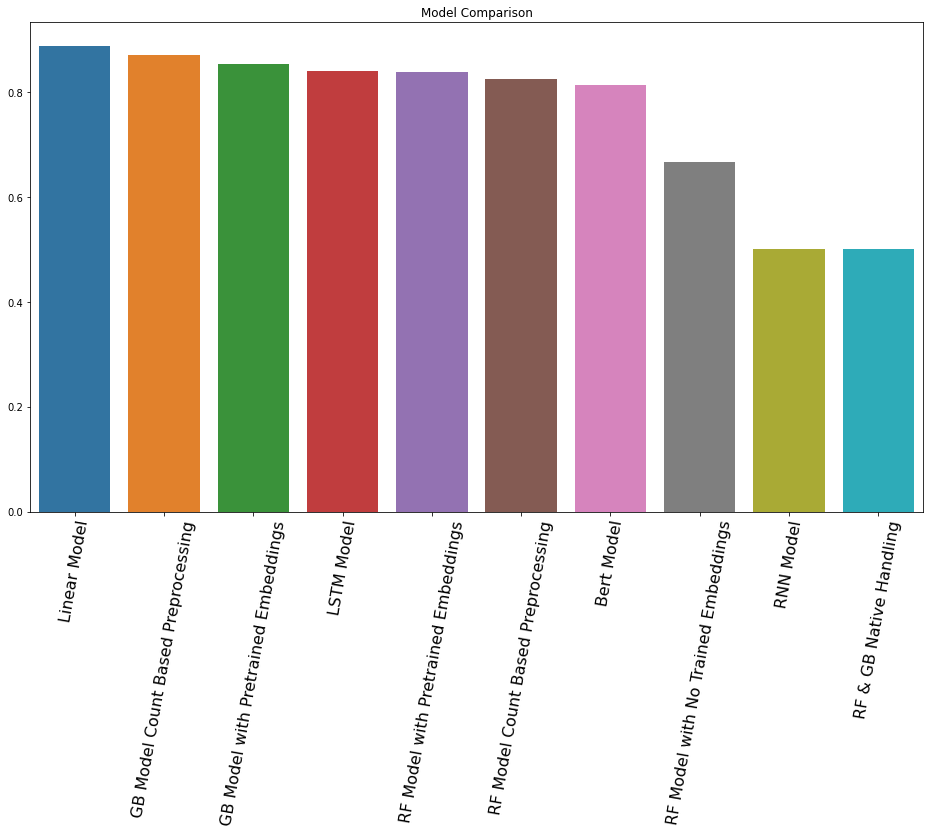

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

model_comparison_dict = {"Linear Model" : 0.8878,
                         "GB Model Count Based Preprocessing": 0.8692,
                         "GB Model with Pretrained Embeddings": 0.8526 ,
                         "LSTM Model": 0.8403,
                         "RF Model with Pretrained Embeddings": 0.8382,
                         "RF Model Count Based Preprocessing": 0.8241,
                         "Bert Model" : 0.8128,
                         "RF Model with No Trained Embeddings": 0.6663,
                         "RNN Model": 0.5,
                         "RF & GB Native Handling": 0.5
 }

plt.figure(figsize = (16,9))
sns.barplot(x = list(model_comparison_dict.keys()),y = list(model_comparison_dict.values()))
plt.xticks(rotation = 80, fontsize = 16)
plt.title("Model Comparison")
plt.show()


<a id='4'></a>
# Conclusion

Modeling tree-based algorithms for NLP tasks is not optimal but possible. Using pre-trained embeddings with these algorithms can give comparable results to the deep learning nlp models. 

Thanks...